### Data Sources

In this notebook, you will get some practice working with data sources that are associated with recommendation systems.  

As a review, remember that the type of data you have available to you determines what recommendation systems are possible:

* Collaborative Filtering
    - requires user-item interaction data

* Demographic Recommenders
    - require user information
    
* Content Based Recommenders
    - require item information
    
* Utility Based Recommenders
    - no strong requirements, but perform better with as many features as possible
    
* Knowledge Based Recommenders
    - require user provided information to filter items


**Intro:** Read in and take a look at the data below. This data is available from [MovieTweetings](https://github.com/sidooms/MovieTweetings).  Following the link provides additional information about the data should you want to know more information. 

In [1]:
import numpy as np
import pandas as pd

movies_dat = pd.read_csv('../data/movies.dat', sep='::', engine='python',
                         header=None, names=['movie_id', 'movie_title', 'movie_genre'])
users_dat = pd.read_csv('../data/users.dat', sep='::', engine='python', \
                        header=None, names=['user_id', 'twitter_id'])
ratings_dat = pd.read_csv('../data/ratings.dat', sep='::', engine='python', \
                          header=None, names=['user_id', 'movie_id','rating','time'])


In [2]:
#look at the datasets using this cell
movies_dat.head()

,movie_id,movie_title,movie_genre
0,18455,Sunrise: A Song of Two Humans (1927),Drama|Romance
1,18578,Wings (1927),Drama|Romance|War|Action
2,19729,The Broadway Melody (1929),Drama|Musical|Romance
3,20585,Why Be Good? (1929),Comedy|Drama|Romance
4,20629,All Quiet on the Western Front (1930),Drama|War


In [3]:
#look at the datasets using this cell
users_dat.head()

,user_id,twitter_id
0,1,1173727172789440518
1,2,339640325
2,3,26009607
3,4,1117265366
4,5,1193197579


In [4]:
#look at the datasets using this cell
ratings_dat.head()

,user_id,movie_id,rating,time
0,1,8722346,8,1580754089
1,2,1502397,7,1580809792
2,3,10526632,8,1580676978
3,3,3513548,8,1579462218
4,3,4082596,8,1580945311


**Question 1:** Based on the data provided, which of the following recommender systems is absolutely not possible to build?

That's right! A demographic recommender would require information about our user


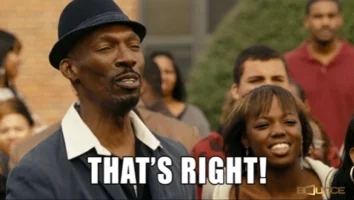

In [5]:
import data_solution_part1 as sp

a = "Collaborative Filtering"
b = "Demographic Based Recommender"
c = "Content Based Recommender"
d = "Utility Based Recommender"
e = "Knowledge Based Recommender"

your_answer = b

sp.answer_one(your_answer)

**Question 2:** If we wanted to build a collaborative filtering recommender system, what dataframe(s) would we absolutely need?

That's right! For collaborative filtering, we only need to know the relationship between the users and movies (items).  This is acheived completely through the ratings_dat.


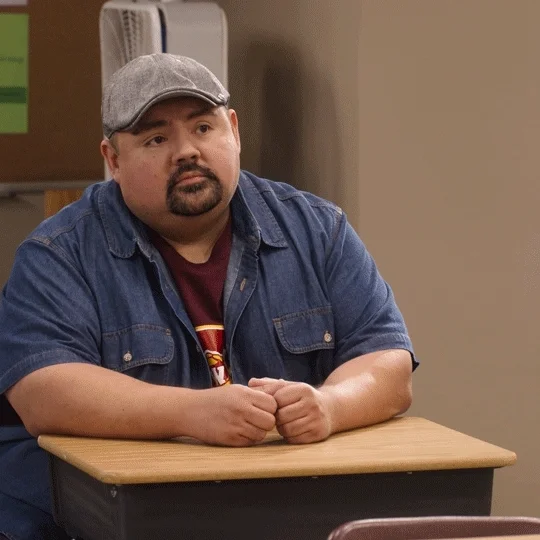

In [6]:
a = "movies_dat"
b = "users_dat"
c = "ratings_dat"
d = "movies_dat and ratings_dat"
e = "all three dataframes are needed"

your_answer = c

sp.answer_two(your_answer)

Exploring and understanding your dataset is super important!  Because of that, you need to do Exploratory Data Analysis (EDA) to understand your dataset!

**Question 3:** How many unique users have rated movies?  How many unique movies are in the dataset?  What is the average rating provided in the dataset?  What is the minimum rating given in the dataset?  How many missing values are in `ratings_dat`? Fill in your answers to each below.

In [7]:
ratings_dat.isnull().sum().sum()

0

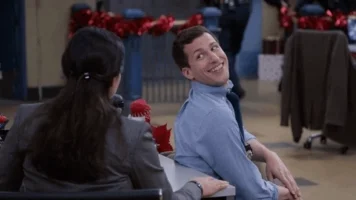

In [8]:
unique_users = len(np.unique(users_dat.user_id))
unique_movies = len(np.unique(movies_dat.movie_id))
avg_rating = np.round(ratings_dat.rating.mean(),2)
min_rating = ratings_dat.rating.min()
max_rating = ratings_dat.rating.max()
missing_vals = ratings_dat.isnull().sum().sum()

your_answer = (unique_users, unique_movies, avg_rating, \
               min_rating, max_rating, missing_vals)

sp.answer_three(your_answer)

**Question 4:** There are two movies that have an average rating of 10, while having more than 2 ratings - these are the two movies with the 'highest average, max number of ratings' combination.  What are these two movies?

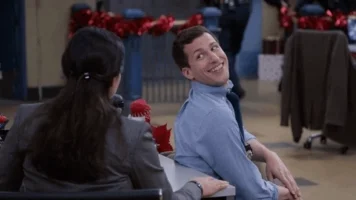

In [9]:
a = "A Woman Under the Influence"
b = "Amadeus"
c = "Batman"
d = "The Crow"
e = "Heat"
f = "The Lord of the Rings: The Return of the King"
g = "The Pursuit of Happyness"
h = "Other"

your_answer = (f, b)

sp.answer_four(your_answer)

In [10]:
final_ratings_df = ratings_dat.set_index('movie_id').join(movies_dat.set_index('movie_id')).reset_index().sort_values('time')

In [11]:
agg_df = final_ratings_df.groupby(['movie_id', 'movie_title']).agg({'rating':['mean', 'count']})

In [12]:
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]

In [13]:
agg_df.sort_values(['rating_mean', 'rating_count'], ascending=False).head(2)

,,rating_mean,rating_count
movie_id,movie_title,,
167260,The Lord of the Rings: The Return of the King (2003),10.0,4
86879,Amadeus (1984),10.0,3


Use the space below to look at the distribution of ratings, and explore any other proporties you might be interested in understanding. Like which user gave the most ratings? Or which user gave the highest ratings on average combined with the most ratings?  

We will dive into how to clean up some characteristics of the data, and then you will be ready to start building your own recommendation systems!

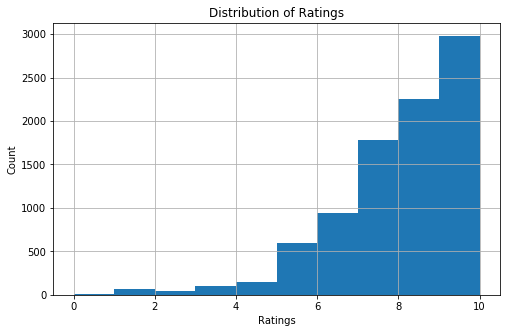

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,5))
ratings_dat.rating.hist();
plt.xlabel('Ratings');
plt.title('Distribution of Ratings');
plt.ylabel('Count');

In [15]:
ratings_dat.user_id.value_counts()[:5] # which user gave the most ratings

2275    43
1804    41
5       37
1546    35
423     34
Name: user_id, dtype: int64

In [16]:
# highest average rating with most ratings per user
agg_df = ratings_dat.groupby('user_id').agg({'rating':['mean', 'count']})
agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
agg_df.sort_values(['rating_mean', 'rating_count'], ascending=False).head(5)

,rating_mean,rating_count
user_id,,
39,10.0,6
3109,10.0,5
1399,10.0,4
3014,10.0,4
3043,10.0,4
